# Logistic Regression Model Improvements

This notebook improves upon the original logistic regression model by performing various optimizations and enhancements, including feature engineering, missing value handling, and hyperparameter tuning using cross-validation.

## 1. Data Loading and Initial Exploration

In [43]:

# Step 1: Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Titanic_train.csv')  # Assuming the file is in the current directory
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Handling Missing Data
We will check and handle missing values by imputing where necessary.

In [33]:

# Step 2: Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:

# Step 3: Handle missing data using SimpleImputer (for Age and Embarked)
imputer = SimpleImputer(strategy='mean')  # Using mean for numerical columns
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill missing embarked values with most frequent
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing Fare values if any
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

df.isnull().sum()


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_25904\534569450.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_25904\534569450.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
# Data Visualization


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

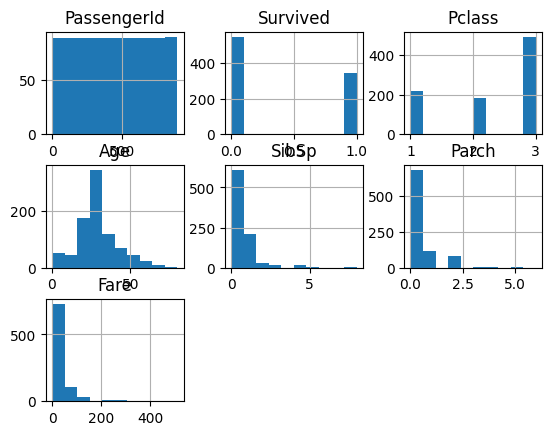

In [36]:
df.hist()


<Axes: xlabel='Fare', ylabel='Count'>

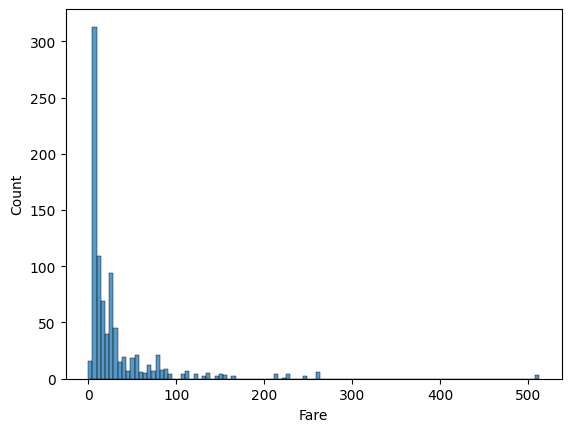

In [37]:
sns.histplot(x="Fare", data= df)


<Axes: >

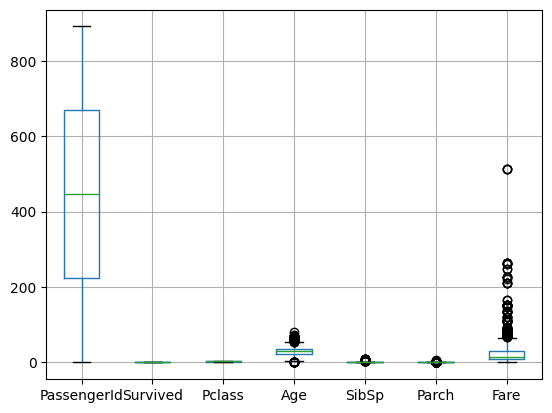

In [38]:
df.boxplot()


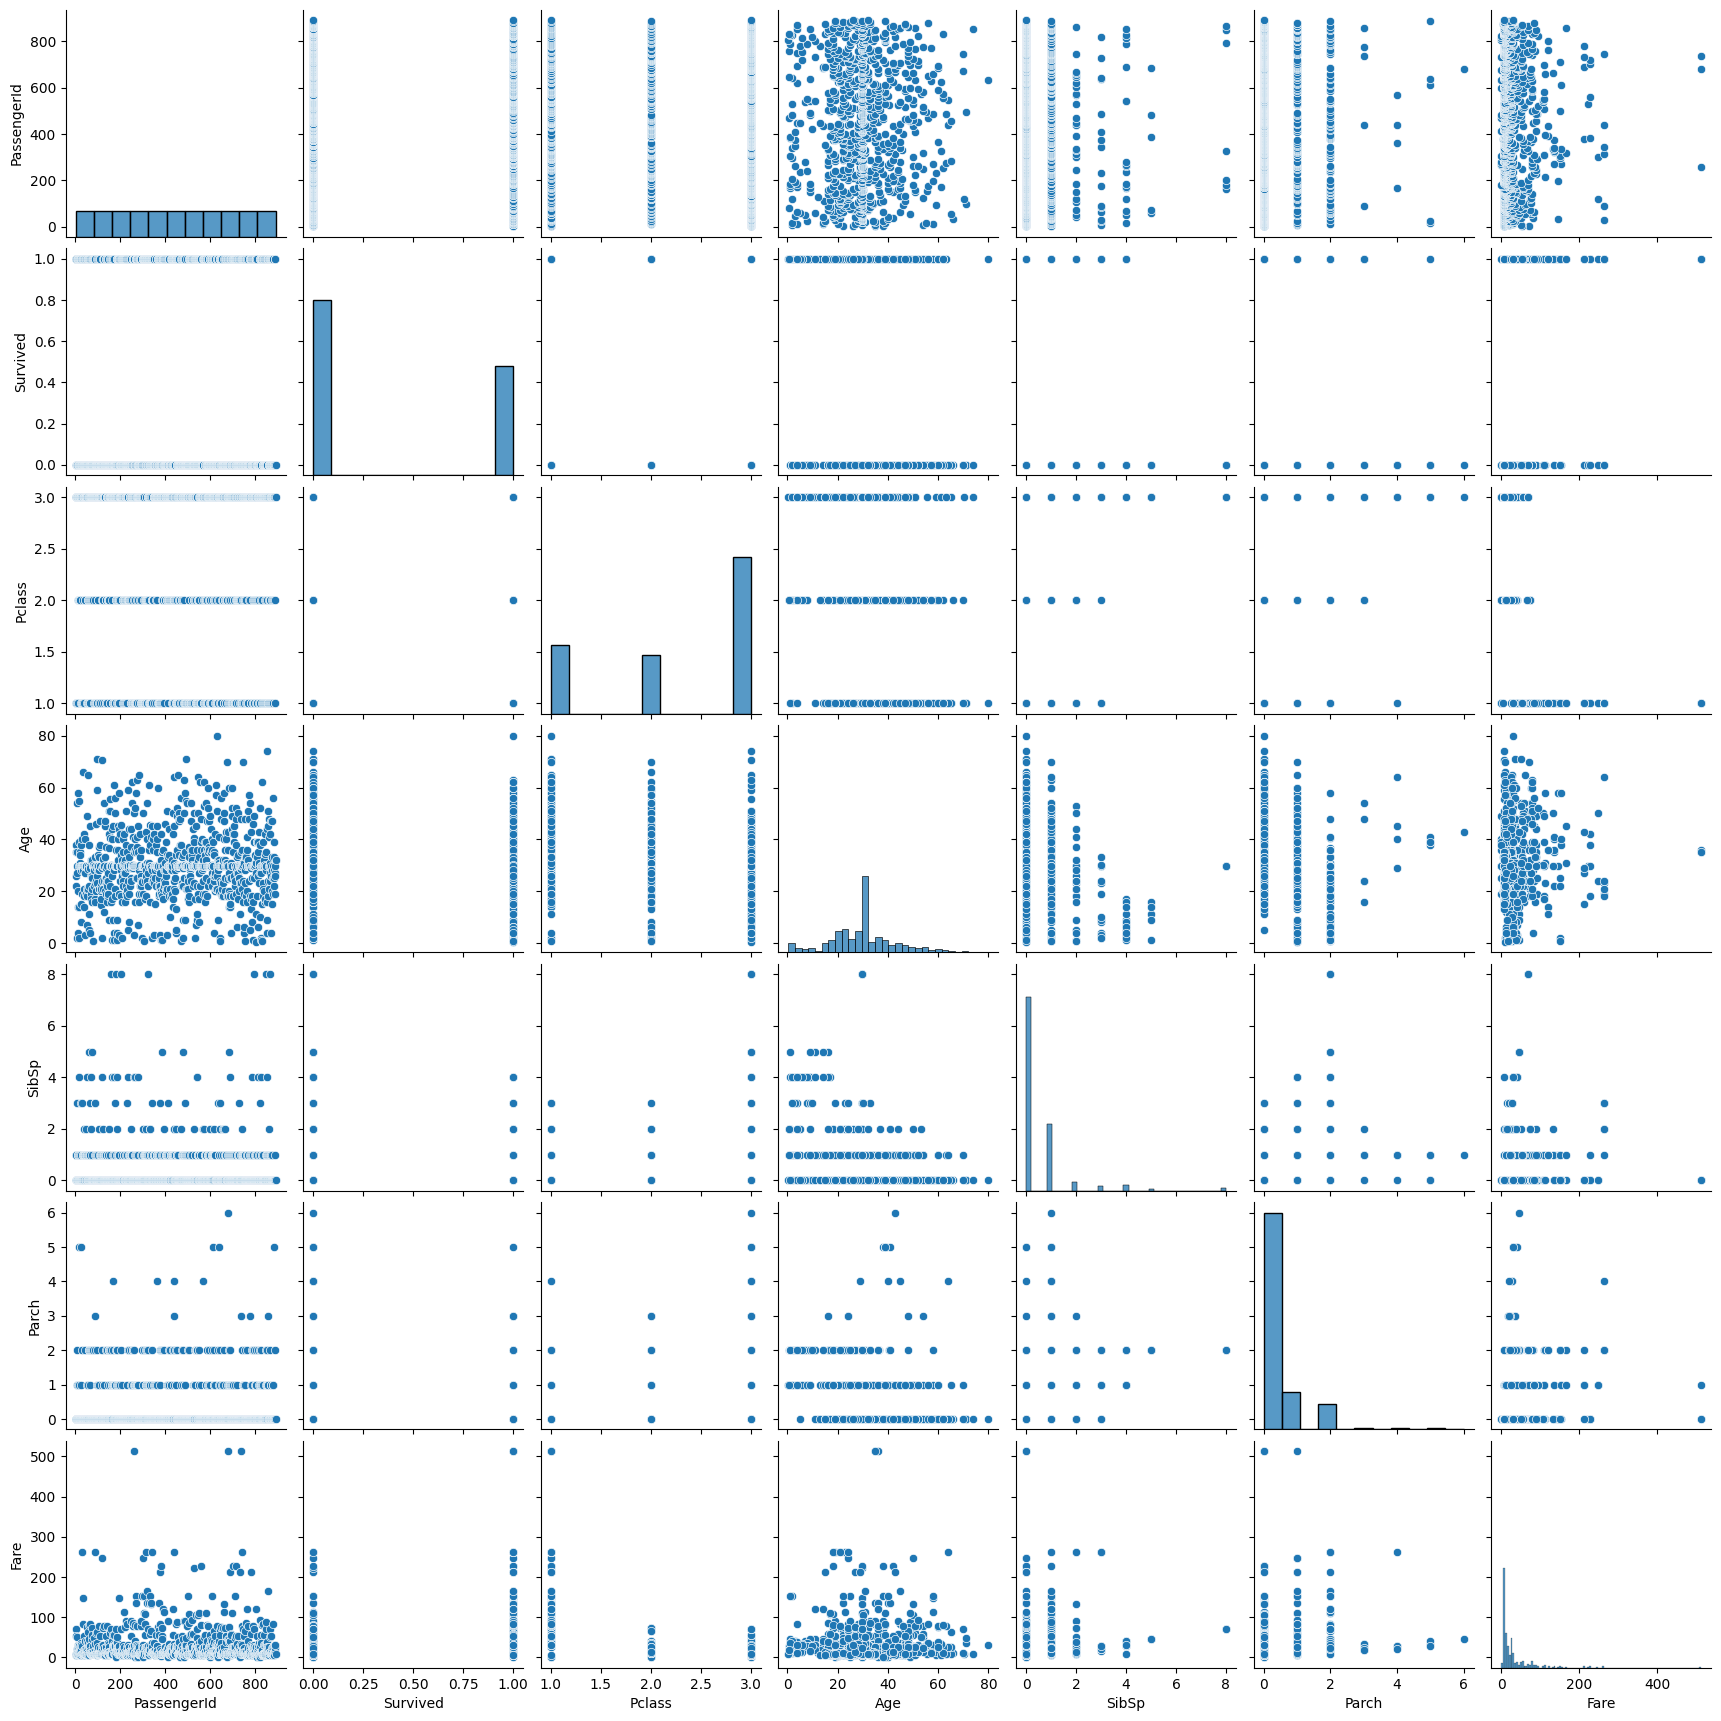

In [39]:
sns.pairplot(data=df)


## 3. Feature Engineering
We will add meaningful features from the existing data.

In [40]:

# Step 4: Feature engineering (creating new feature: FamilySize)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Encoding categorical variables (Sex and Embarked)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,True,False,True


## 4. Model Training and Hyperparameter Tuning
We will use cross-validation to find the best hyperparameters and test different regularization techniques.

In [41]:

# Step 5: Define target and features
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])  # Exclude irrelevant features
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)


## 5. Model Evaluation
We will evaluate the model using accuracy, precision, recall, and other metrics.

The confusion matrix in your heatmap provides a detailed summary of the model's classification performance. Let’s break down the values from the matrix:

```
[[90  15]   # 90 true negatives, 15 false positives
 [19  55]]  # 19 false negatives, 55 true positives
```

### Interpretation:

- **True Negatives (TN)** = 90  
  - These are the instances where the model correctly predicted the negative class (e.g., passengers who did not survive).

- **False Positives (FP)** = 15  
  - These are the instances where the model incorrectly predicted the positive class (e.g., passengers predicted to survive but didn’t).

- **False Negatives (FN)** = 19  
  - These are the instances where the model incorrectly predicted the negative class (e.g., passengers predicted not to survive but actually survived).

- **True Positives (TP)** = 55  
  - These are the instances where the model correctly predicted the positive class (e.g., passengers who survived).

### Metrics Based on the Confusion Matrix:

1. **Accuracy**:
   - Formula: \( \frac{TP + TN}{TP + TN + FP + FN} \)
   - Calculation: \( \frac{90 + 55}{90 + 55 + 15 + 19} = \frac{145}{179} \approx 0.81 \)  
   - **Accuracy**: ~81%  
     This means the model correctly classified 81% of the total predictions.

2. **Precision** (for the positive class, i.e., survivors):
   - Formula: \( \frac{TP}{TP + FP} \)
   - Calculation: \( \frac{55}{55 + 15} = \frac{55}{70} \approx 0.79 \)  
   - **Precision**: ~79%  
     This means that of all the passengers predicted to survive, 79% actually survived.

3. **Recall** (for the positive class):
   - Formula: \( \frac{TP}{TP + FN} \)
   - Calculation: \( \frac{55}{55 + 19} = \frac{55}{74} \approx 0.74 \)  
   - **Recall**: ~74%  
     This means the model correctly identified 74% of all actual survivors.

4. **F1 Score**:
   - Formula: \( 2 \times \frac{Precision \times Recall}{Precision + Recall} \)
   - Calculation: \( 2 \times \frac{0.79 \times 0.74}{0.79 + 0.74} \approx 0.76 \)
   - **F1 Score**: ~0.76  
     This score balances both precision and recall, and a value of 0.76 indicates the model does a decent job at classifying both survivors and non-survivors.

### Summary:
- The model has **high accuracy (81%)**, meaning it makes correct predictions most of the time.
- The **precision (79%)** indicates that when the model predicts someone survived, it's correct about 79% of the time.
- The **recall (74%)** shows that it successfully identifies 74% of the actual survivors.
- The **F1 score (0.76)** balances both precision and recall, showing reasonable performance, though there's room for improvement.


Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76


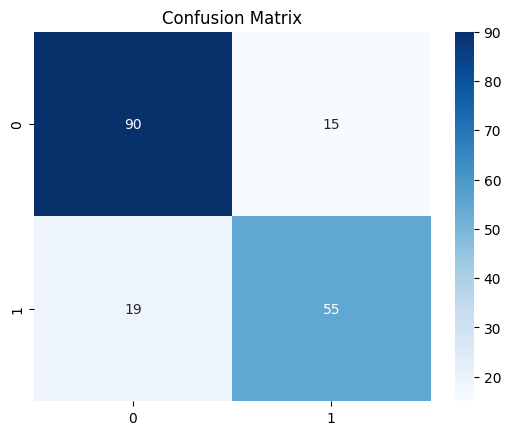

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [42]:

# Step 6: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [44]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


C:\Users\Yogesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


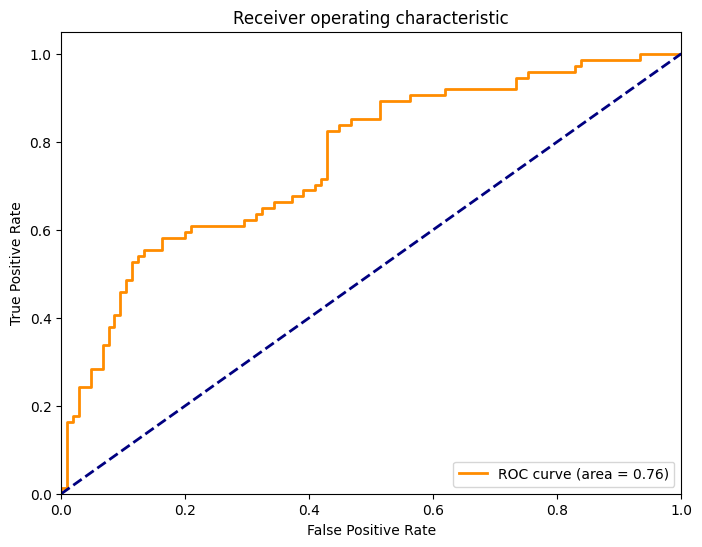

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
